# Контрольная работа
Донская Мария

In [254]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

Выгрузим данные и псомотрим на них

In [255]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [257]:
df["is_paid"].unique()

array([ True, False])

Видим что банарная колонка **is_paid** содержит данные в неудобном для применения моделей виде

Заменим Teur, False на 1, 0 соответственно

In [258]:
cleanup_nums = {"is_paid": {True: 1, False: 0},
               "num_subscribers": {0: 0.00000000001}} # во избежение извлечения логорифма из 0 заменим на близкое к нулю значение
df = df.replace(cleanup_nums)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147.0,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792.0,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174.0,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451.0,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276.0,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Для набора данных 'udemy_courses' рассмотрим регрессию **num_subscribers на price, is_paid & content_duration**

Спецификация: $numSubscribers=\beta_0+\beta_1price+\beta_2isPaid+\beta_3contentDuration+u$

Подгоним модель и найдем параметры регрессии

In [259]:
# Подгонка модели
num_eq = smf.ols(formula='abs(np.log(num_subscribers))~price+is_paid+content_duration', data=df).fit()
num_eq.params.round(3)

Intercept           8.372
price               0.006
is_paid            -2.445
content_duration    0.029
dtype: float64

### Пострим диаграммы рассеяния

График **num_subscribers~price**

<Axes: xlabel='num_subscribers', ylabel='price'>

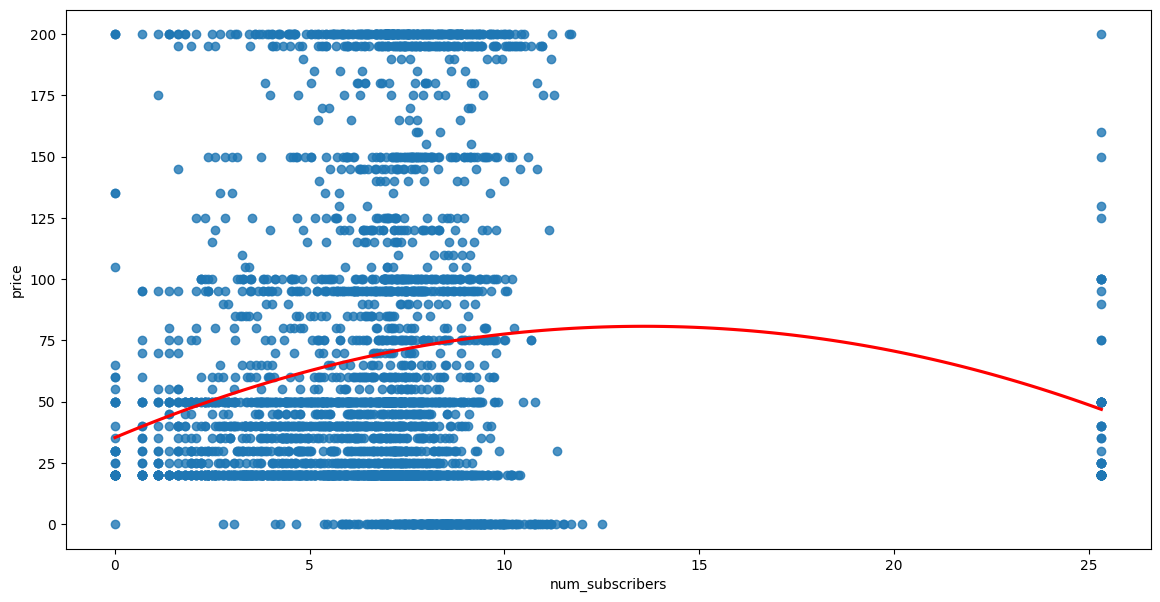

In [260]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(data=df, x=abs(np.log(df['num_subscribers'])), y='price', ci=None, order = 2, line_kws={"color": "r"})

Вывод: не видим наглядной зависимости, следовательно регрессия с этой предиктарной пременной плохо описывает целевую 

График **num_subscribers~is_paid**

<Axes: xlabel='num_subscribers', ylabel='is_paid'>

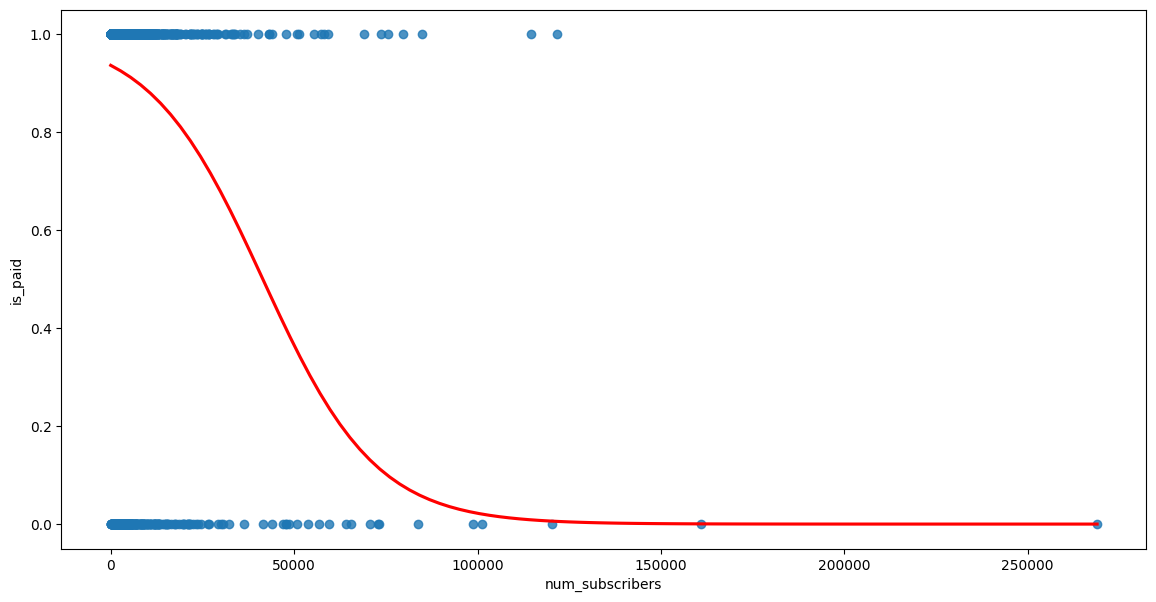

In [261]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(data=df, x='num_subscribers', y='is_paid', ci=None, logistic=True, line_kws={"color": "r"})

Вывод: график показывает вероятность, что конкретное число подпсисчиков в палтном курсе

График **num_subscribers~content_duration**

<Axes: xlabel='num_subscribers', ylabel='content_duration'>

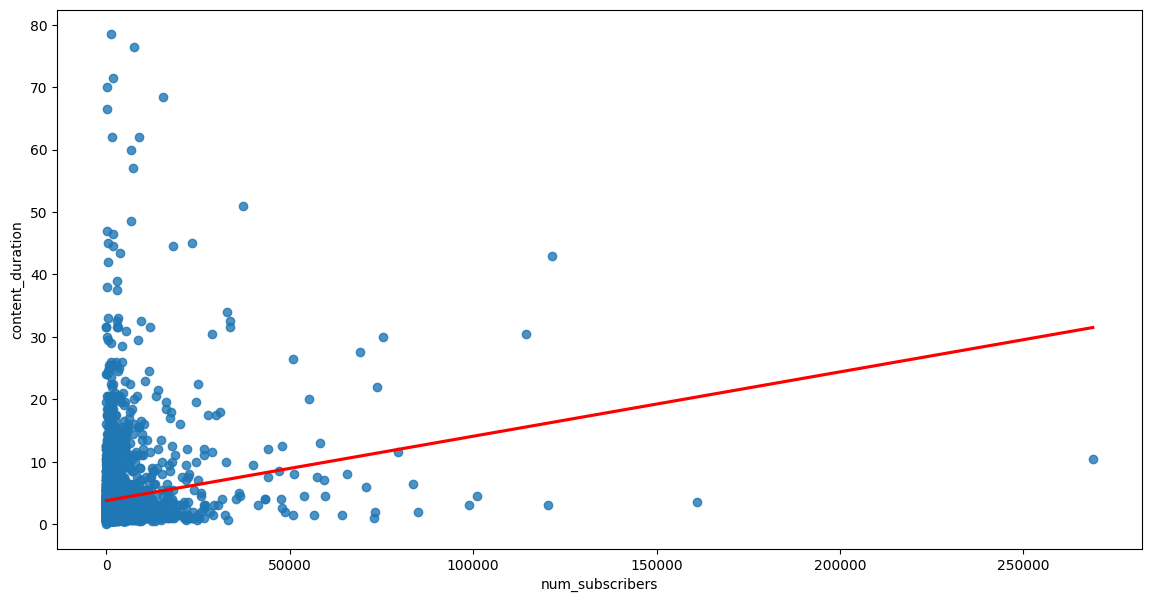

In [262]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(data=df, x='num_subscribers', y='content_duration', ci=None, order=1, line_kws={"color": "r"})

Вывод: видим, что есть курсы с очень большим числом подписчиков, что портит картину регрессии

### Изменим порядок независисмой переменной регрессии content_duration

In [263]:
# Подгонка модели
num_eq2 = smf.ols(formula='abs(np.log(num_subscribers))~price+is_paid+content_duration+I(content_duration**2)', data=df).fit()
num_eq2.params.round(3)

Intercept                   8.340
price                       0.006
is_paid                    -2.449
content_duration            0.046
I(content_duration ** 2)   -0.000
dtype: float64

График: **num_subscribers~content_$duration^2$**

<Axes: xlabel='num_subscribers', ylabel='content_duration'>

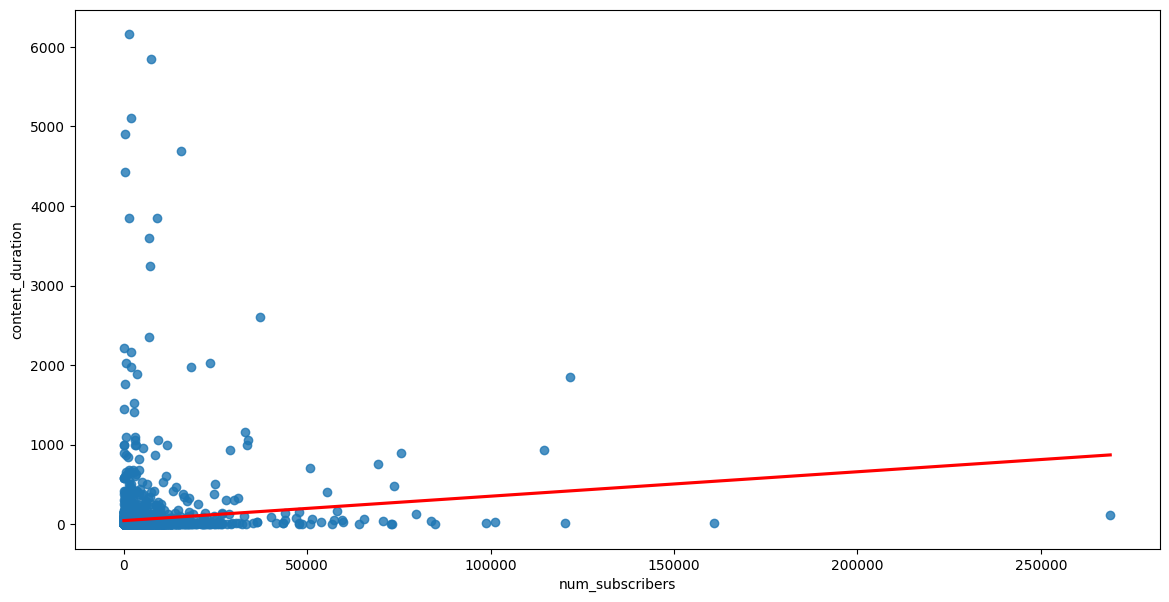

In [264]:
f, ax = plt.subplots(figsize=(14, 7))
sns.regplot(data=df, x='num_subscribers', y=df['content_duration']**2, ci=None, order=1, line_kws={"color": "r"})

Вывод: видим что введение 2 порядка переменной content_duration бесполезно

### Вычислим основные параметры регрессии

Вычислим TSS, ESS, RSS

In [265]:
TSS = num_eq.centered_tss
ESS = num_eq.ess
RSS = num_eq.ssr
print("TSS =", TSS.round(3))
print("ESS =", ESS.round(3))
print("RSS =", RSS.round(3))

TSS = 43814.533
ESS = 1796.178
RSS = 42018.355


Вычислим $R^2$ и $R^2_{adj}$

In [266]:
R2 = num_eq.rsquared
R2_adj = num_eq.rsquared_adj
print("R2 =", R2.round(3))
print("R2_adj =", R2_adj.round(3))

R2 = 0.041
R2_adj = 0.04


Вычислим стандартрую ошибку регрессии

In [267]:
n = len(df["content_duration"])
k = 3
s = np.sqrt(RSS / (n - k - 1))
print("s =", s.round(3))

s = 3.382


Спецификация: $numSubscribers=8.372+0.006*price+-2.445*isPaid+0.029*contentDuration+u$

### Интерпретация модели
1) При  увеличении цены курса на 1 доллар, кол-во подписчиков увеличивается на 0.006% 
2) На платные курсы в среднем подписывется на 2.445% меньше людей
3) При увелечении продолжительности курса на час, число подписчиков увеличивается на 0.029%

### Исследуем параметры регрессии на значимость

In [268]:
num_eq2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     abs(np.log(num_subscribers))   R-squared:                       0.041
Model:                                      OLS   Adj. R-squared:                  0.040
Method:                           Least Squares   F-statistic:                     39.50
Date:                          Fri, 31 Mar 2023   Prob (F-statistic):           1.95e-32
Time:                                  17:05:53   Log-Likelihood:                -9697.7
No. Observations:                          3678   AIC:                         1.941e+04
Df Residuals:                              3673   BIC:                         1.944e+04
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.3402      0.196     42.571      0.000       7.956       8.724
price                        0.0062      0.001      6.088      0.000       0.004       0.008
is_paid                     -2.4486      0.213    -11.520      0.000      -2.865      -2.032
content_duration             0.0456      0.019      2.377      0.018       0.008       0.083
I(content_duration ** 2)    -0.0004      0.000     -0.981      0.327      -0.001       0.000
==============================================================================
Omnibus:                     2590.533   Durbin-Watson:                   0.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50086.713
Skew:                           3.142   Prob(JB):                         0.00
Kurtosis:                      19.951   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\underline{Нас\:интересует\:вторая\:часть\:таблицы:}$

In [269]:
# Отобразим интересующую нас таблицу
table = num_eq2.summary().tables[1]
table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.3402,0.196,42.571,0.000,7.956,8.724
price,0.0062,0.001,6.088,0.000,0.004,0.008
is_paid,-2.4486,0.213,-11.520,0.000,-2.865,-2.032
content_duration,0.0456,0.019,2.377,0.018,0.008,0.083
I(content_duration ** 2),-0.0004,0.000,-0.981,0.327,-0.001,0.000


In [270]:
# Можно сохранить в виде html файла и уже его преобразовать в DataFrame
df_t = pd.read_html(table.as_html(), header=0, index_col=0)[0]
df_t

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.3402,0.196,42.571,0.000,7.956,8.724
price,0.0062,0.001,6.088,0.000,0.004,0.008
is_paid,-2.4486,0.213,-11.520,0.000,-2.865,-2.032
content_duration,0.0456,0.019,2.377,0.018,0.008,0.083
I(content_duration ** 2),-0.0004,0.000,-0.981,0.327,-0.001,0.000


Модель была подогнана по 3677 наблюдениям. Уровень значимости 1%

Вычислим критическое значение для t-теста. Ответ округлим до трёх десятичных знаков.

In [271]:
alpha = 0.01 # уровень значимости
print('Уровень значимости alpha: ', alpha)
DF = int(num_eq2.df_resid) # число степеней свободы 
t_crit = scipy.stats.t.ppf(1-alpha/2, DF)
print('Критическое значение t_crit: ', t_crit.round(3))

Уровень значимости alpha:  0.01
Критическое значение t_crit:  2.577


In [272]:
df_t['znachimosty'] = df_t.apply(lambda x : 'znachim' if np.abs(x['t']) > t_crit else 'ne znachim', axis = 1 )
df_t

,coef,std err,t,P>|t|,[0.025,0.975],znachimosty
Intercept,8.3402,0.196,42.571,0.000,7.956,8.724,znachim
price,0.0062,0.001,6.088,0.000,0.004,0.008,znachim
is_paid,-2.4486,0.213,-11.520,0.000,-2.865,-2.032,znachim
content_duration,0.0456,0.019,2.377,0.018,0.008,0.083,ne znachim
I(content_duration ** 2),-0.0004,0.000,-0.981,0.327,-0.001,0.000,ne znachim


**Видим, что все коэффиценты кроме первого в торого порядка content_duration значимы**

### Отфильтруем данные по бинарной переменной is_paid

Для набора данных 'udemy_courses' рассмотрим регрессию **num_subscribers на price & content_duration, при условии is_paid = 1**

In [273]:
df_paid = df.loc[df["is_paid"] == 1]
# Подгонка модели
num3_eq = smf.ols(formula='abs(np.log(num_subscribers))~price+content_duration', data=df_paid).fit()
num3_eq.params.round(3)

Intercept           5.929
price               0.006
content_duration    0.028
dtype: float64

Вычислим стандартрую ошибку регрессии

In [274]:
n = len(df_paid["content_duration"])
k = 2
RSS = num3_eq.ssr
s = np.sqrt(RSS / (n - k - 1))
print("s =", s.round(3))

s = 3.507


Сравним с заранее полученной ошибкой регрессии s = 3.382

Вывод: предсказательная точность упала

### Изучим регрессию 3 порядка без константы

Рассмотрим регрессию **num_subscribers на price & is_paid, content_duration, content_duration^2, content_duration^3** без константы

In [275]:
# Подгонка модели
num_eq4 = smf.ols(formula='abs(np.log(num_subscribers))~price+is_paid+content_duration+I(content_duration**2)+I(content_duration**3)', data=df).fit()
num_eq4.params.round(3)

Intercept                   8.374
price                       0.006
is_paid                    -2.440
content_duration            0.024
I(content_duration ** 2)    0.001
I(content_duration ** 3)   -0.000
dtype: float64

Вычислим $R^2$

In [276]:
R2 = num_eq4.rsquared
print("R2 =", R2.round(3))

R2 = 0.041


Сравним с заранее полученным $R^2$ = 0.041

Вывод: получеенное значение не отличается, следовательно переменная отклика так же объясняется предикторной переменной